## Exercise one: Identifying handwritten numbers

### Question 1

Give a list of applications where automatic recognition of hand-written numbers would be useful.

ANSWER:
1. identifying numbers (phones, zip-codes) in questioning for loyalty systems in shops
2. checking the exam's results (for example, Mathematics or Physics at school)
3. digitalize hand-written math equations from notes to computer (for scientists and mathematician could be useful)
4. reconstruction bad-quality images with numbers (depends on needs but could be useful for historical purposes)
5. digitalize doctor's prescription (dosage). But for that better to recognize letters as well :)

In [2]:
#necessary libraries imports
from tensorflow import keras
import matplotlib.pyplot as plt

2023-02-11 23:11:56.630377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#divide data on test/train
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()

In [86]:
x_train.shape

(60000, 28, 28)

In [87]:
# convert the flatten training and test set images from 28x28 pixels to a column of 784 pixels for each image (row)
x_train = x_train.reshape(60000, 784)
x_train.shape


(60000, 784)

In [88]:
x_test = x_test.reshape(10000, 784)
x_test.shape

(10000, 784)

In [89]:
# Rescale x_train and x_test to values between zero and one
x_train = x_train/255
x_test = x_test/255

In [90]:
#convert the train and testset labels to two new variables
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Model definition:

In [109]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [110]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

Training and evaluation:


In [112]:
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 7ms/step - loss: 0.4050 - accuracy: 0.8836 - val_loss: 0.3049 - val_accuracy: 0.9133
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3106 - accuracy: 0.9125 - val_loss: 0.3048 - val_accuracy: 0.9153
Epoch 3/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2963 - accuracy: 0.9158 - val_loss: 0.2797 - val_accuracy: 0.9245
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2891 - accuracy: 0.9184 - val_loss: 0.2898 - val_accuracy: 0.9183
Epoch 5/12
375/375 [==============================] - 2s 7ms/step - loss: 0.2822 - accuracy: 0.9210 - val_loss: 0.2926 - val_accuracy: 0.9188
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2790 - accuracy: 0.9227 - val_loss: 0.2823 - val_accuracy: 0.9233
Epoch 7/12
375/375 [==============================] - 3s 7ms/step - loss: 0.2763 - accuracy: 0.9240 - val_loss: 0.2848 - val_accuracy: 0.9222
Epoch 

Plot the training history loss and accuracy for both the training set and validation set.

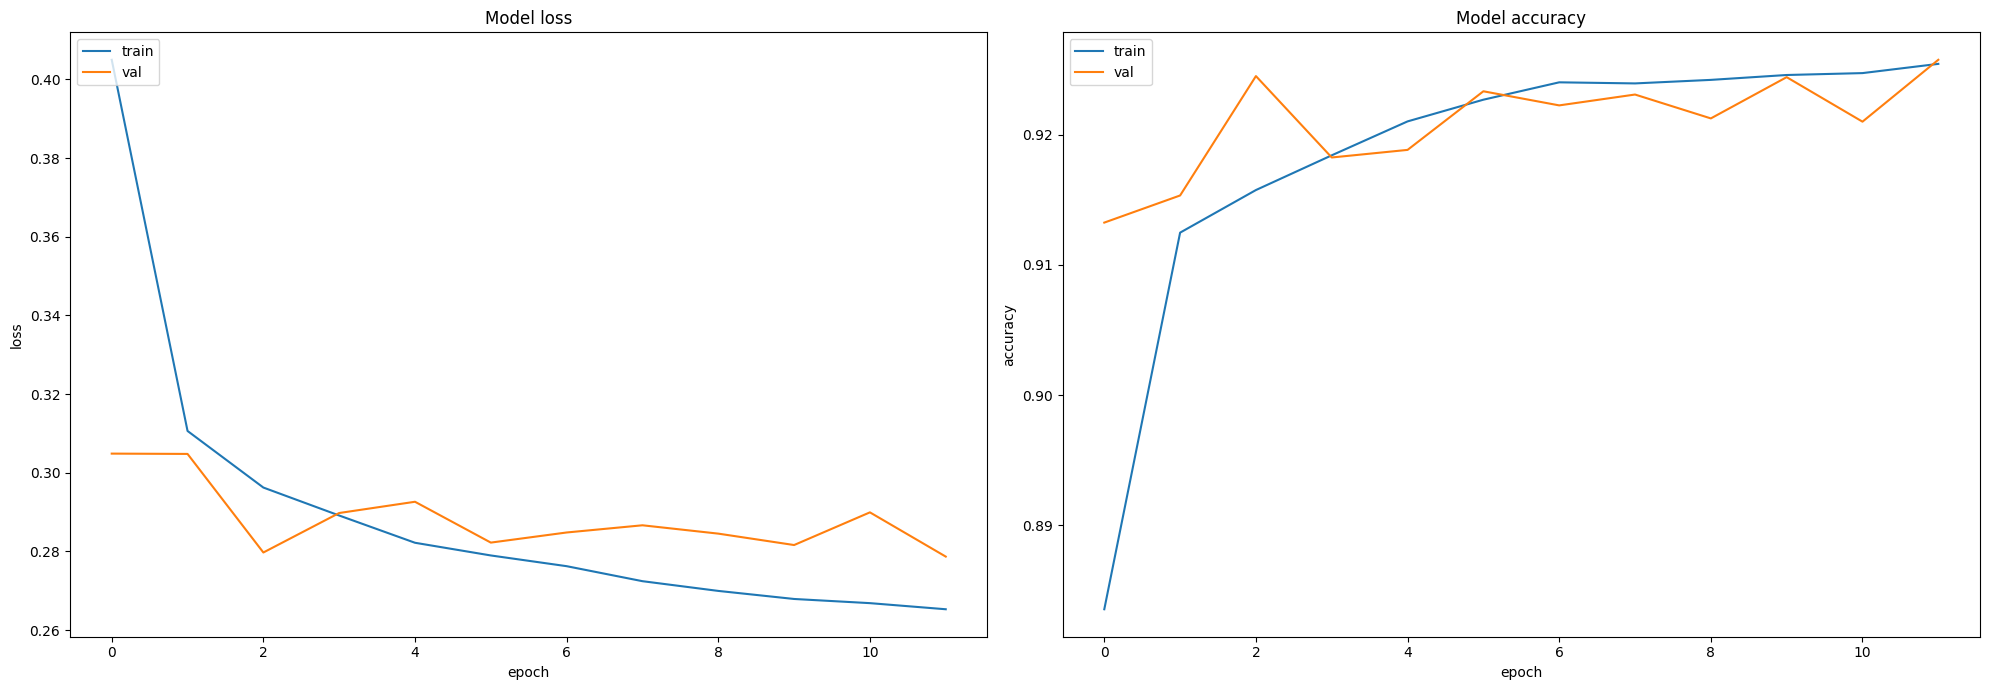

In [113]:
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

### Question 2

Describe how the accuracy and loss evaluated on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model

ANSWER:
It's logically that with the growth of accuracy the loss of the model is decreasing. The most "powerful" are the first 6 epochs in both cases, and after that we can see not so huge changes in it. Also, the train set is tend to get better and better (but it could lead to overfitting) while comparing with validation set, the last is not so stable.

To avoid overfitting we can get the optimal amount of epochs:

In [46]:
#getting optimal amount of epochs
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)

history_perfect = model.fit(x_train, y_train, batch_size = 128,
                    epochs = 25, validation_split=0.2,
                    callbacks =[earlystopping])


Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2633 - accuracy: 0.9265 - val_loss: 0.2754 - val_accuracy: 0.9240
Epoch 2/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2620 - accuracy: 0.9252 - val_loss: 0.2840 - val_accuracy: 0.9242
Epoch 3/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2597 - accuracy: 0.9274 - val_loss: 0.2910 - val_accuracy: 0.9201
Epoch 4/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2590 - accuracy: 0.9271 - val_loss: 0.2840 - val_accuracy: 0.9247
Epoch 5/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2590 - accuracy: 0.9280 - val_loss: 0.2872 - val_accuracy: 0.9226
Epoch 6/25
375/375 [==============================] - 2s 4ms/step - loss: 0.2567 - accuracy: 0.9283 - val_loss: 0.2834 - val_accuracy: 0.9247


Therefore, the optimal number of epochs to train most dataset is 6.

In [57]:
#evaluating the perfomance
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [58]:
loss

0.2796417772769928

In [59]:
accuracy

0.9246000051498413

### Question 3

Explain whether you think this accuracy is sufficient for some uses of automatic hand-written digit classification, and why.

Overall, 92% is not that bad accuracy. Depending on the consequences of your decision, we can use a different threshold to make the decision. If the action links with some kind of medicine (like one of the example with digitalyzing prescriptions), accuracy should be higher. But for general everyday tasks, it could be enough to use the model.
 For improving the model, we can play around increasing the number of layers and/or neurons, change the activation function or loss function.

### Question 4

 Explain how linear activation of units limits the possible computations this model can perform.


Activation function work well with linear relationships. With classification and computer vision tasks it's better to use more powerful ones to get the higher results to learn the non-linear patterns. Handwritten numbers is a non-linear task. Without that, our MLP model will not learn any non-linear relationship in the data.

In [ ]:
# Also, there are other disadvantages of using linear acti:
# - It's not possible to use backpropagation as the derivative of the function is a constant and has no relation to the input x. A
# - All layers of the neural network will collapse into one if a linear activation function is used.
# - The gradients for negative input are zero, which means for activations in that region, the weights are not updated during backpropagation. This can create dead neurons that never get activated
# They allow backpropagation because now the derivative function would be related to the input, and it’s possible to go back and understand which weights in the input neurons can provide a better prediction.
# They allow the stacking of multiple layers of neurons as the output would now be a non-linear combination of input passed through multiple layers. Any output can be represented as a functional computation in a neural network.

# Without the application of an activation function, the only operations in computing the output of a multilayer perceptron would be the linear products between the weights and the input values.

In [81]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))
model_2.add(keras.layers.Dense(10, activation='softmax'))

In [98]:
model_2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [99]:
history_2 = model_2.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.3288 - accuracy: 0.9073 - val_loss: 0.1794 - val_accuracy: 0.9495
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.1485 - accuracy: 0.9571 - val_loss: 0.1283 - val_accuracy: 0.9617
Epoch 3/12
375/375 [==============================] - 2s 5ms/step - loss: 0.1014 - accuracy: 0.9707 - val_loss: 0.1127 - val_accuracy: 0.9668
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 0.0929 - val_accuracy: 0.9703
Epoch 5/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.0916 - val_accuracy: 0.9718
Epoch 6/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0474 - accuracy: 0.9863 - val_loss: 0.0810 - val_accuracy: 0.9761
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0820 - val_accuracy: 0.9743
Epoch 

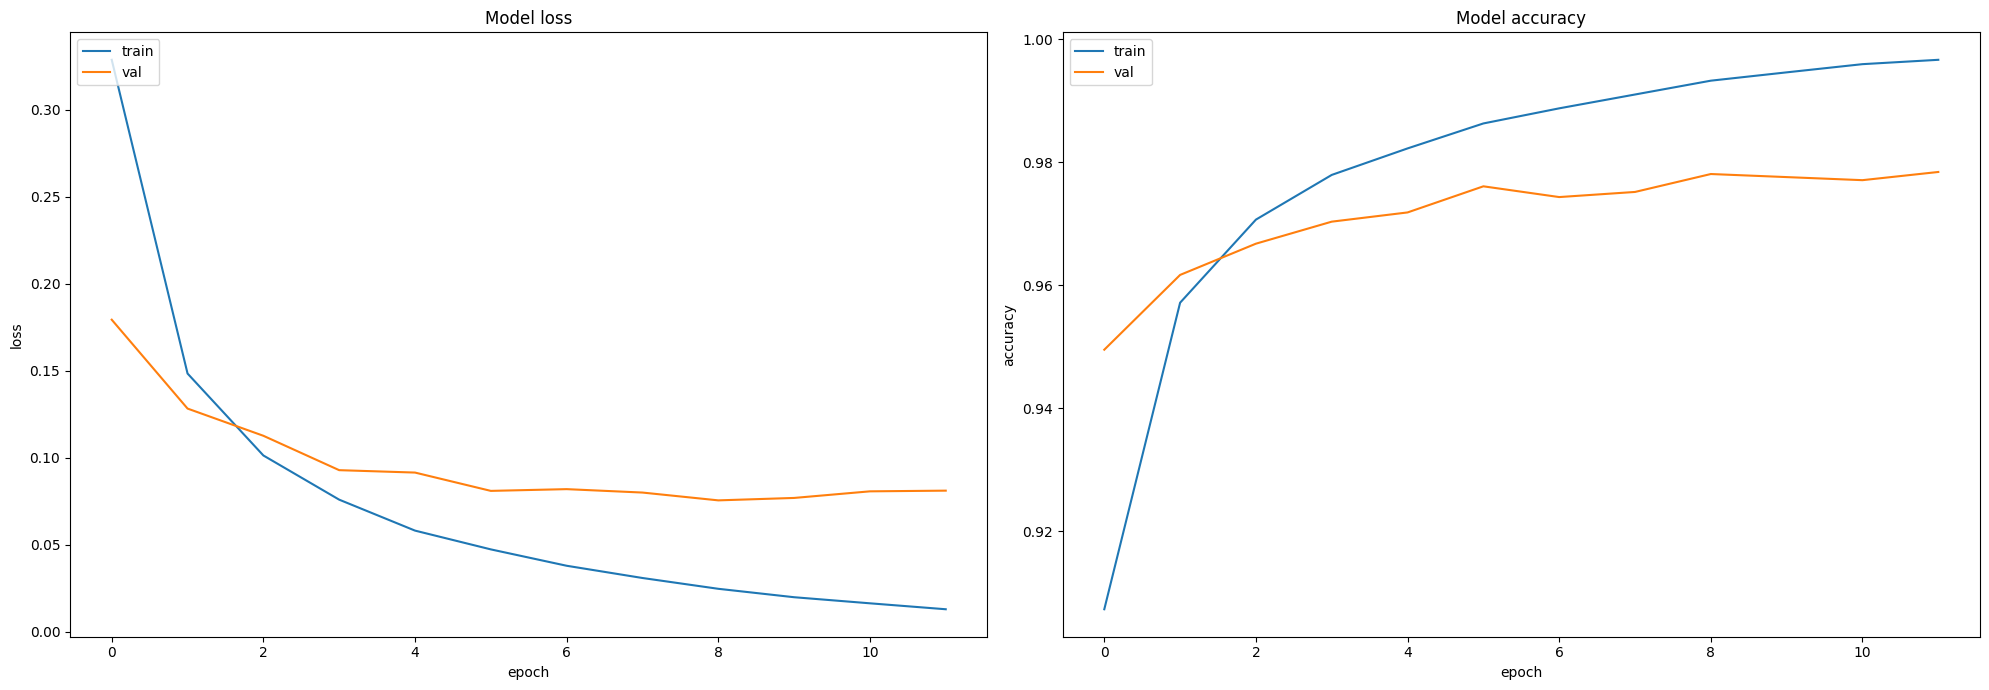

In [104]:
#plots accuracy and loss for the second (non-linear model)

plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

In [105]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)
loss_2

0.07072564959526062

In [106]:
accuracy_2

0.9801999926567078

In [107]:
#getting optimal amount of epochs for non-linear

history_perfect_2 = model_2.fit(x_train, y_train, batch_size = 128,
                    epochs = 25, validation_split=0.2,
                    callbacks =[earlystopping])

Epoch 1/25
375/375 [==============================] - 3s 7ms/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0765 - val_accuracy: 0.9787
Epoch 2/25
375/375 [==============================] - 3s 7ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0790 - val_accuracy: 0.9795
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0839 - val_accuracy: 0.9779
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0825 - val_accuracy: 0.9797
Epoch 5/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0838 - val_accuracy: 0.9789
Epoch 6/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0862 - val_accuracy: 0.9790


### Question 5

Describe how this training history differs from the previous model, for the training and validation sets. Explain what this tells us about the generalisation of the model.

ANSWER:
The lines became smoother, and we see how stable is the line in validation set. Also, we see the improvement in accuracy and loss' decreasing comparing with linear model. Each epoch is better than previous one while in linear it was non-stable. Relu seems more efficient as it only requires a simple threshold operation to compute the activation. ALso, comparing the computing time relu is a little faster, but it's also because of the simple structure.

### Deep convolutional networks

Prepare our data differently.

In [114]:
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()
#add extra dimension for colour channel
x_train = x_train.reshape(60000, 28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [115]:
x_test = x_test.reshape(10000, 28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [116]:
# Rescale x_train and x_test to values between zero and one
x_train = x_train/255
x_test = x_test/255

In [117]:
#convert the train and testset labels to two new variables
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Now we will define a convolutional learning model with 2 convolutional layers that result from 32 convolutional filters into the first layer and 64 filters into the second. We will use 3x3 pixel filters to sample from the image to the first layer, and the same to sample from the first layer to the second. We will use rectified activation functions for both convolutional layers. We will use pooling to downsample the second convolutional layer to half its size in both spatial dimensions (so one quarter of the pixels). We will flatten the resulting feature map to one dimension, then use one fully- connected layer to link our network to the labels.

In [123]:
#define a convolutional learning model with 2 convolutional layers
model_3 = keras.Sequential()
model_3.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model_3.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(128, activation="relu"))
model_3.add(keras.layers.Dense(10, activation="softmax"))
model_3.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')

In [124]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               1179776   
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                     

In [125]:
history_3 = model_3.fit(x_train, y_train, batch_size=128,
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 64s 167ms/step - loss: 0.2287 - accuracy: 0.9301 - val_loss: 0.0720 - val_accuracy: 0.9790
Epoch 2/6
375/375 [==============================] - 62s 165ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0559 - val_accuracy: 0.9847
Epoch 3/6
375/375 [==============================] - 62s 167ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0508 - val_accuracy: 0.9856
Epoch 4/6
375/375 [==============================] - 62s 166ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0505 - val_accuracy: 0.9862
Epoch 5/6
375/375 [==============================] - 63s 168ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0418 - val_accuracy: 0.9893
Epoch 6/6
375/375 [==============================] - 63s 167ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.0432 - val_accuracy: 0.9877


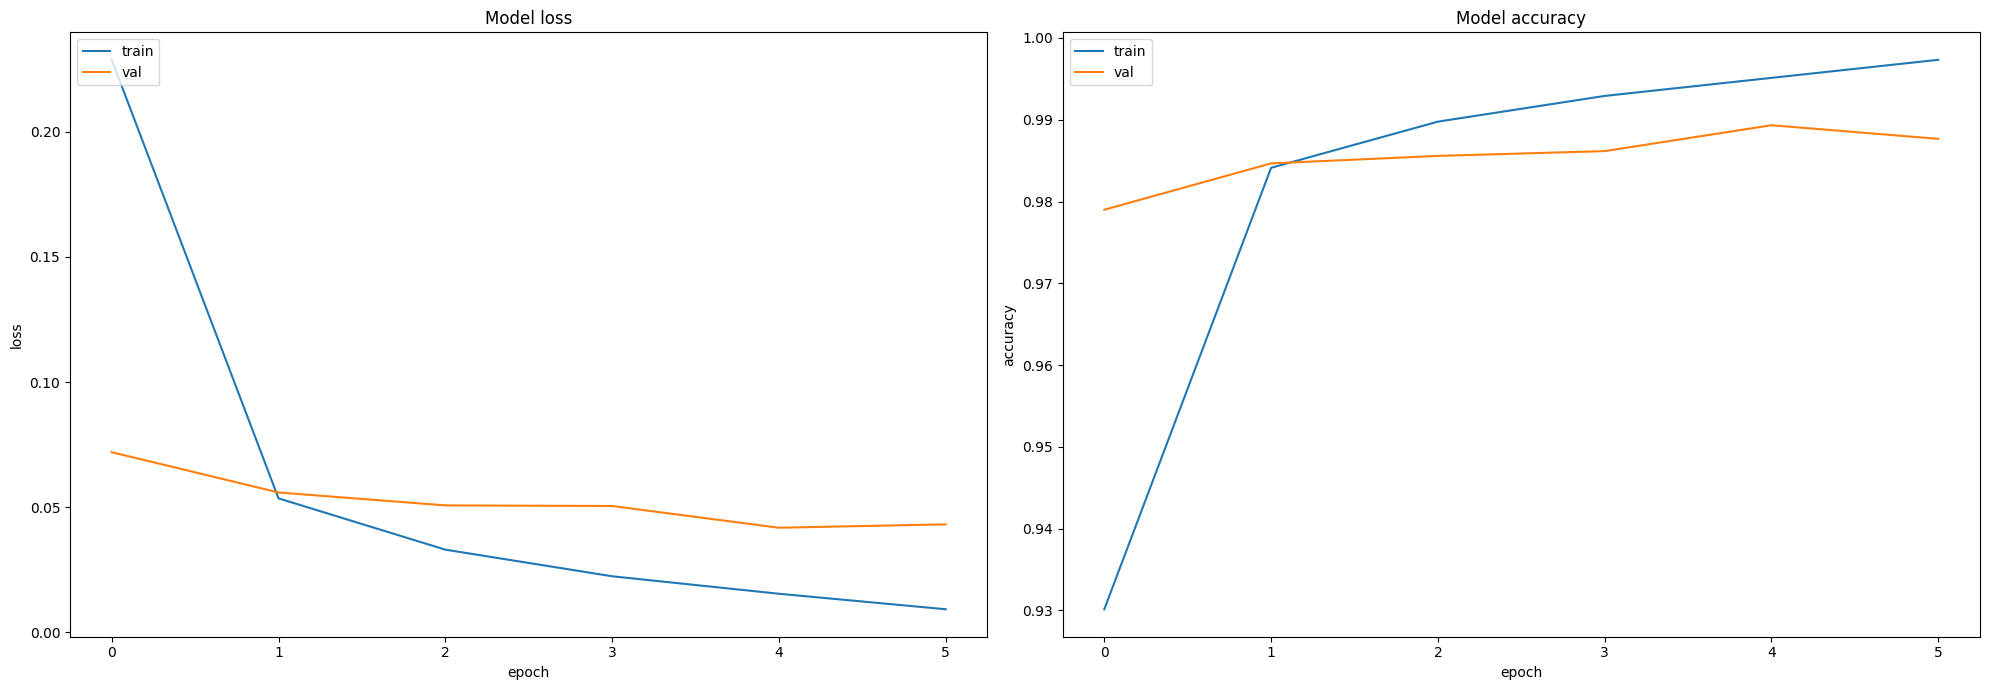

In [126]:
#plots with with 2 convolutional layers

plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

In [127]:
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test, verbose=0)
loss_3

0.0333559513092041

In [128]:
accuracy_3

0.9890999794006348

### Question 6

Explain whether you think this is sufficient for the uses of automatic hand-written digit classification you listed in Question 1, and why

ANSWER:

Overall, then higher result of prediction, then better. In our case, the time of running is ok, capacity of CPU can deal with calculations. So, why not to have the good accuracy?
Of course, when we talk about limits, in real life we have more complex and huge datasets, and easier models could be more efficient (on business purposes, it's cheaper and faster). But when we talk about health care (like one of our example - 5, medicine) and similar fields where the price of errors is really high (military and emergency services, child care, etc) we demand the accuracy to be as high as possoble.


### Question 7

Dropout’ is a method used in deep network training to prevent overfitting of training data and focus on aspects of the learning model that will generalise to new data. Research and describe the principles of overfitting and how dropout can reduce this

ANSWER:
Overall, overfitting is when a model is trained too well on the training data but relly bad on performing (low bias, high variance)
Principles of overfitting:
- too complex model for the data (in neural network - a lot of layers/number of neurons),
- no/law regularization (more about that below with the dropout explanation),
- lack of training data (the model tend to overfit when the dataset is small),
- using too many epochs and adding a lot of features (the model catch all patterns and noise).

Dropout method is literally refers to dropping out the nodes (input and hidden layer).
It forces the layers to take more or less responsibility for the input by taking a probabilistic approach. Lossing the part of 'information' from the learning process helps to learn the average that leads to 'perfect' (non-overfitted) model. So, we can solve the problem getting the model less complex, more general and not learning the noise.

In [1]:
# adding dropout layer

from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout

model_4 = keras.Sequential()
model_4.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model_4.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(0.25, 0.25)))
model_4.add(keras.layers.Flatten())

model_4.add(keras.layers.Dense(0.5, activation="relu"))
model_4.add(keras.layers.Dense(10, activation="softmax"))
model_4.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')
model_4.add(Dropout(0.5)) #  50% of the activations in that layer will be set to zero


2023-02-12 22:00:42.009345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'keras' is not defined

In [ ]:
model_4.summary()

### Question 8

In comparison to the previous (convolutional) model:
a) How does the time taken for each training epoch differ? (Google Colab may
not show this clearly, in which case run this on your own hardware)
b) How does the training history differ for both the training and validation sets?
c) Howwelldoestheresultingmodelgeneralise?

#